## Jobs, Steps, Machines
* **Jobs** are sequences of interdependent steps
* **Steps** run on machines and are possibly dependent on other steps
* **Machines** can execute steps one after another

## Chronology
* Represents an mapping of machines to sequences of steps
* i.e., each machine **only** knows which step it should execute next
* This **does not** include timing! (when these steps are executed)

## Schedules
* A schedule is induced by a chronology:
    * If the machines execute steps as soon as they can (as defined by the chronology),
    * they will created a schedule (chronology with timing)

## Neihbourhood (of a Chronology)

* **Neighbours** of a chronology `c` are constructed by swapping two steps of `c`.
* For such neighbours **validity** needs to be ensured


---

### Validity of Chronologies

* In general not all chronologies describe a valid schedule
* There may be *cyclic depedencies* between jobs and their execution on machines
* These invalid chronologies will usually be filtered out upon construction

---


## Evaluation Function

Evaluating a chronology is straightforward:
 
 1. inflate the chronology to a full schedule
 2. calculate the runtime of the schedule
 3. the runtime is the evaluation score

## Search Algorithms

* Based on the above modelling framework, a number of algorithms have been implemented
* The implementations are based on the listings given in the lecture
* The following algorithms were implemented:
 * iterated hillclimber
 * stochastic hillclimber
 * simulated annealing
* In general, **SA produced best results** (but more expensive the hillclimber)

## Problems

In [3]:
from parser import get_problems
import jobshop_localsearch as jls
from mapping import map_problem_to_jls
from renderer import render_jls, render_improvement

problems = get_problems("jobshop1.txt")

def execute_search(problemidx, n_iterations=10):
    global problems
    problem = problems[problemidx]
    print(problem)
    jobs = map_problem_to_jls(problem)
    jls.set_params(problem)
    schedule,vals = jls.search_hillclimber_iterated(jobs, n_iterations)
    render_improvement(vals)
    render_jls(problem.nr_machines, problem.nr_jobs, schedule)

name:  Fisher and Thompson 6x6 instance, alternate name (mt06); #machines: 6; #jobs: 6
job (machine/runtime):  s(0, 2, 1) s(0, 0, 3) s(0, 1, 6) s(0, 3, 7) s(0, 5, 3) s(0, 4, 6)
job (machine/runtime):  s(1, 1, 8) s(1, 2, 5) s(1, 4, 10) s(1, 5, 10) s(1, 0, 10) s(1, 3, 4)
job (machine/runtime):  s(2, 2, 5) s(2, 3, 4) s(2, 5, 8) s(2, 0, 9) s(2, 1, 1) s(2, 4, 7)
job (machine/runtime):  s(3, 1, 5) s(3, 0, 5) s(3, 2, 5) s(3, 3, 3) s(3, 4, 8) s(3, 5, 9)
job (machine/runtime):  s(4, 2, 9) s(4, 1, 3) s(4, 4, 5) s(4, 5, 4) s(4, 0, 3) s(4, 3, 1)
job (machine/runtime):  s(5, 1, 3) s(5, 3, 3) s(5, 5, 9) s(5, 0, 10) s(5, 4, 4) s(5, 2, 1)


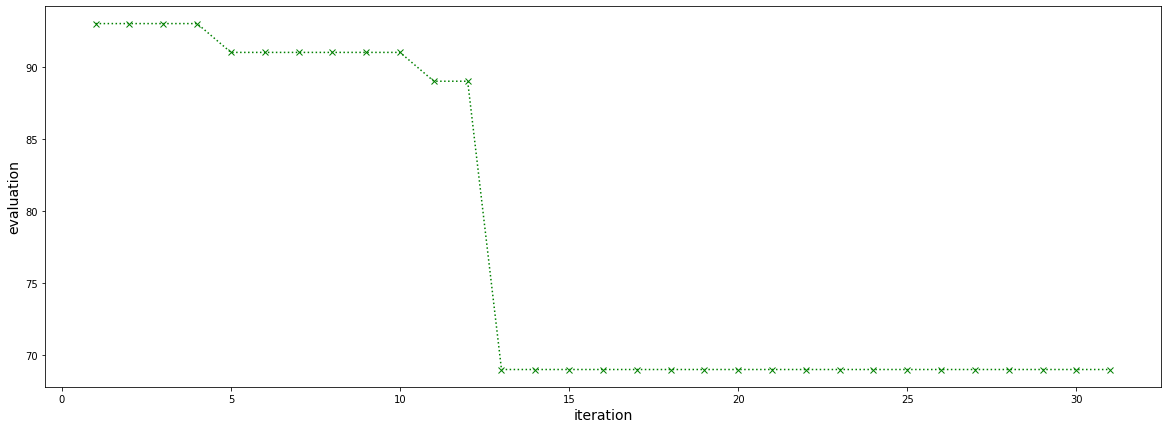

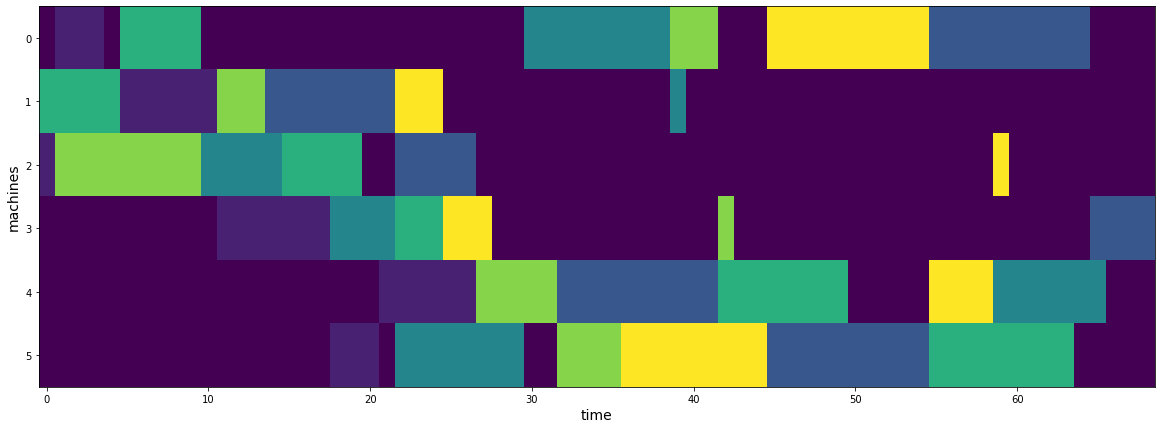

In [4]:
execute_search(5,30)

name:  Lawrence 10x5 instance (Table 3, instance 3); also called (setf3) or (F3); #machines: 5; #jobs: 10
job (machine/runtime):  s(0, 1, 23) s(0, 2, 45) s(0, 0, 82) s(0, 4, 84) s(0, 3, 38)
job (machine/runtime):  s(1, 2, 21) s(1, 1, 29) s(1, 0, 18) s(1, 4, 41) s(1, 3, 50)
job (machine/runtime):  s(2, 2, 38) s(2, 3, 54) s(2, 4, 16) s(2, 0, 52) s(2, 1, 52)
job (machine/runtime):  s(3, 4, 37) s(3, 0, 54) s(3, 2, 74) s(3, 1, 62) s(3, 3, 57)
job (machine/runtime):  s(4, 4, 57) s(4, 0, 81) s(4, 1, 61) s(4, 3, 68) s(4, 2, 30)
job (machine/runtime):  s(5, 4, 81) s(5, 0, 79) s(5, 1, 89) s(5, 2, 89) s(5, 3, 11)
job (machine/runtime):  s(6, 3, 33) s(6, 2, 20) s(6, 0, 91) s(6, 4, 20) s(6, 1, 66)
job (machine/runtime):  s(7, 4, 24) s(7, 1, 84) s(7, 0, 32) s(7, 2, 55) s(7, 3, 8)
job (machine/runtime):  s(8, 4, 56) s(8, 0, 7) s(8, 3, 54) s(8, 2, 64) s(8, 1, 39)
job (machine/runtime):  s(9, 4, 40) s(9, 1, 83) s(9, 0, 19) s(9, 2, 8) s(9, 3, 7)


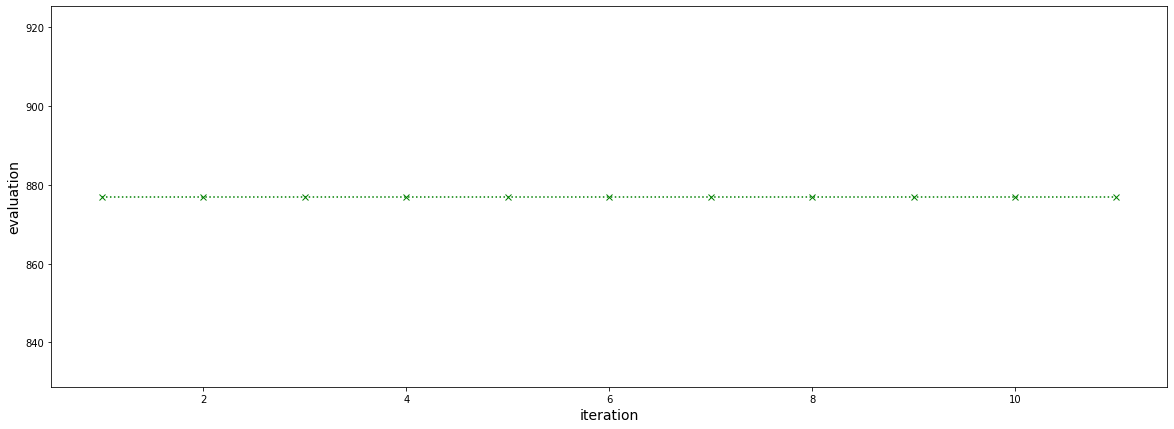

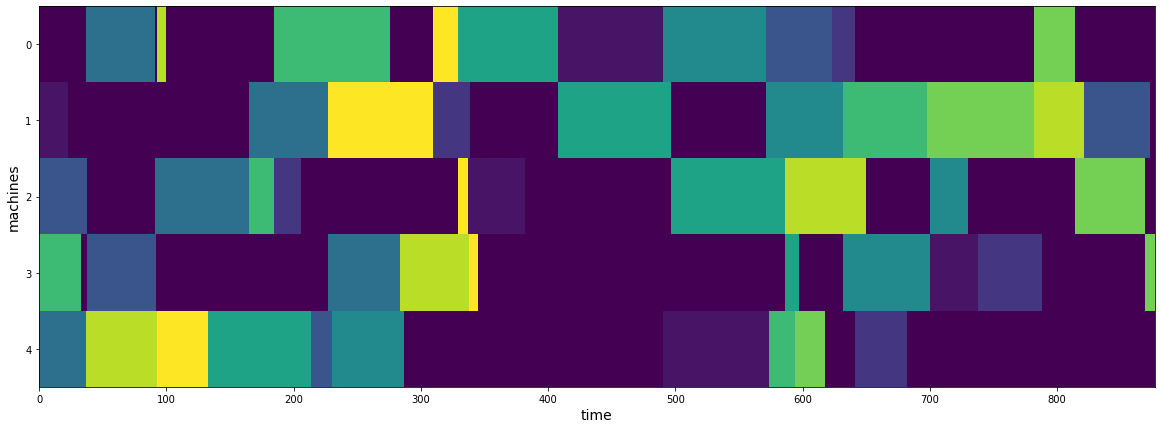

In [5]:
execute_search(10,10)

name:  deadlier 10x10 instance from Bruce Gamble (BRG1); #machines: 10; #jobs: 10
job (machine/runtime):  s(0, 0, 96) s(0, 1, 69) s(0, 2, 25) s(0, 3, 5) s(0, 4, 55) s(0, 5, 15) s(0, 6, 88) s(0, 7, 11) s(0, 8, 17) s(0, 9, 82)
job (machine/runtime):  s(1, 0, 11) s(1, 1, 48) s(1, 2, 67) s(1, 3, 38) s(1, 4, 18) s(1, 7, 24) s(1, 6, 62) s(1, 5, 92) s(1, 9, 96) s(1, 8, 81)
job (machine/runtime):  s(2, 2, 67) s(2, 1, 63) s(2, 0, 93) s(2, 4, 85) s(2, 3, 25) s(2, 5, 72) s(2, 6, 51) s(2, 7, 81) s(2, 8, 58) s(2, 9, 15)
job (machine/runtime):  s(3, 2, 30) s(3, 1, 35) s(3, 0, 27) s(3, 4, 82) s(3, 3, 44) s(3, 7, 92) s(3, 6, 25) s(3, 5, 49) s(3, 9, 28) s(3, 8, 77)
job (machine/runtime):  s(4, 1, 53) s(4, 0, 83) s(4, 4, 73) s(4, 3, 26) s(4, 2, 77) s(4, 6, 33) s(4, 5, 92) s(4, 9, 99) s(4, 8, 38) s(4, 7, 38)
job (machine/runtime):  s(5, 1, 20) s(5, 0, 44) s(5, 4, 81) s(5, 3, 88) s(5, 2, 66) s(5, 6, 70) s(5, 5, 91) s(5, 9, 37) s(5, 8, 55) s(5, 7, 96)
job (machine/runtime):  s(6, 1, 21) s(6, 2, 93) s(6, 4,

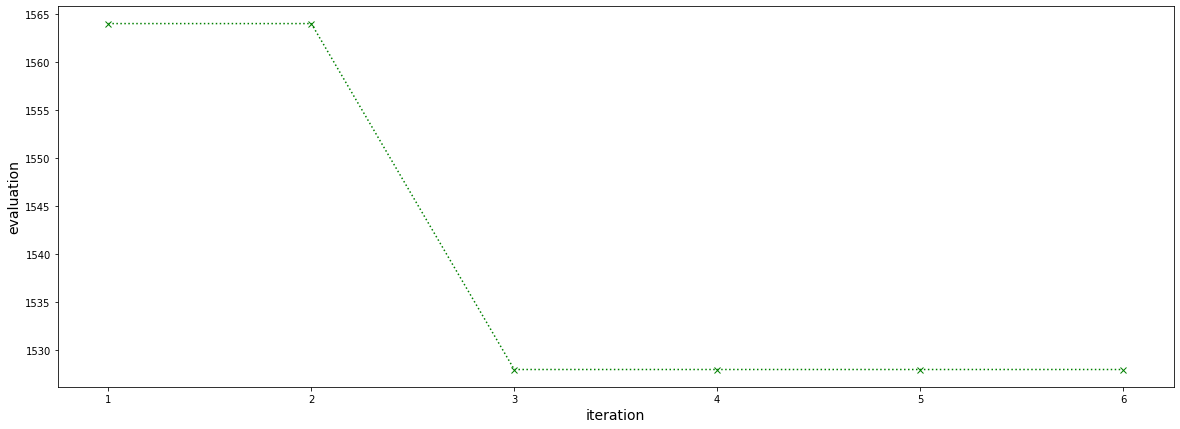

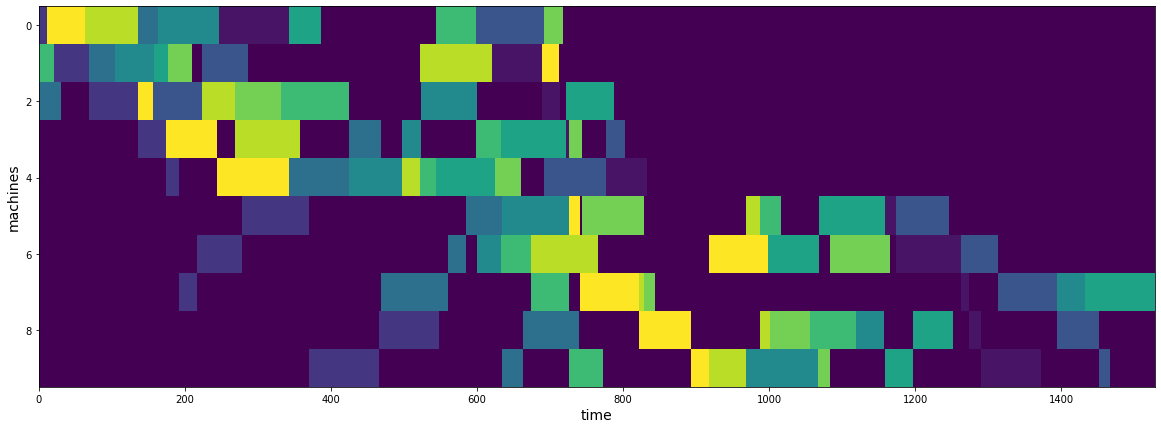

In [6]:
execute_search(50,5)